##### 世界時鐘 ( 顯示各個城市的時間 )
這篇教學會使用 PyQt5 的 QLabel 標籤，搭配標籤的文字變數應用，製作一個簡單的時鐘，最後還會搭配 Python 的 datetime 函式庫，\
製作出同時顯示不同時區時間的時鐘。

##### 製作時鐘，顯示台灣本地時間 
在畫面中加入兩個 QLabel，其中一個只是單純的文字提示，另外一個則是顯示目前時間，使用 datetime.datetime.now 取得目前所在位置時區的時間，\
並搭配 QTimer 定時器，就能讓時間每隔一秒進行更新。

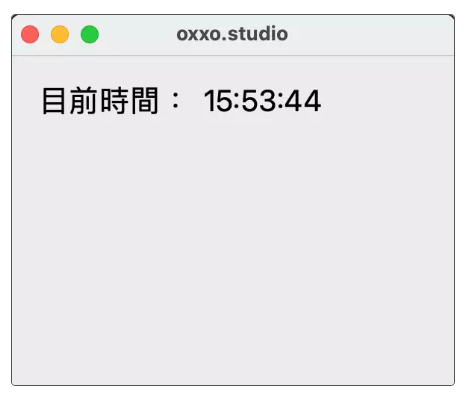

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
import datetime

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 300)

label1 = QtWidgets.QLabel(Form)          # 加入 QLabel 顯示文字
label1.setGeometry(20,10,100,40)
label1.setStyleSheet('font-size:20px;')
label1.setText('目前時間：')

label2 = QtWidgets.QLabel(Form)          # 加入 QLabel 顯示時間
label2.setGeometry(130,10,200,40)
label2.setStyleSheet('font-size:20px;')

GMT = datetime.timezone(datetime.timedelta(hours=8))
def count():
    now = datetime.datetime.now(tz=GMT).strftime('%H:%M:%S')   # 取得目前的時間，格式使用 H:M:S
    label2.setText(now)        # QLabel 顯示數字

timer = QtCore.QTimer()        # 加入定時器
timer.timeout.connect(count)   # 設定定時要執行的 function
timer.start(1000)              # 啟用定時器，設定間隔時間為 500 毫秒

Form.show()
sys.exit(app.exec_())

class 寫法：

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
import datetime

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(400, 300)
        self.ui()

    def ui(self):
        self.GMT = datetime.timezone(datetime.timedelta(hours=8))

        self.label1 = QtWidgets.QLabel(self)          # 加入 QLabel 顯示文字
        self.label1.setGeometry(20,10,100,40)
        self.label1.setStyleSheet('font-size:20px;')
        self.label1.setText('目前時間：')

        self.label2 = QtWidgets.QLabel(self)          # 加入 QLabel 顯示時間
        self.label2.setGeometry(130,10,200,40)
        self.label2.setStyleSheet('font-size:20px;')

    def clock(self):
        now = datetime.datetime.now(tz=self.GMT).strftime('%H:%M:%S')   # 取得目前的時間，格式使用 H:M:S
        self.label2.setText(now)        # QLabel 顯示數字

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    timer = QtCore.QTimer()             # 加入定時器
    timer.timeout.connect(Form.clock)   # 設定定時要執行的 function
    timer.start(1000)                   # 啟用定時器，設定間隔時間為 500 毫秒
    sys.exit(app.exec_())

##### 世界時鐘，同時顯示不同時區時間 
了解原理後，就能先建立不同時區的串列，再藉由串列搭配 for 迴圈產生對應的 QLabel ( 可以減少許多程式碼 )，就能在畫面中一次顯示多個時區的時間。

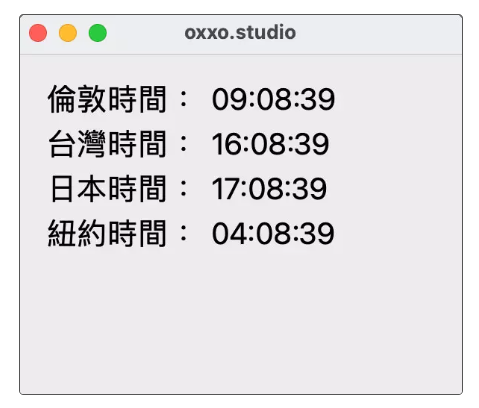

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
import datetime

app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 300)

# 定義產生不同時區時間的函式
GMT = datetime.timezone(datetime.timedelta(hours=8))
def timezone(h):
    GMT = datetime.timezone(datetime.timedelta(hours=h))      # 取得時區
    now = datetime.datetime.now(tz=GMT).strftime('%H:%M:%S')  # 取得該時區的時間
    return now

name = ['倫敦','台灣','日本','紐約']          # 四個時區的名稱串列
loc_time = [1,8,9,-4]                      # 四個時區的 GMT 數字
labels_1 = {}
labels_2 = {}

for i in name:
    index = name.index(i)                               # 位置對應順序
    labels_1[i] = QtWidgets.QLabel(Form)                # 加入 QLabel 顯示位置
    labels_1[i].setGeometry(20, 10+index*30, 100, 40)
    labels_1[i].setStyleSheet('font-size:20px;')
    labels_1[i].setText(f'{i}時間：')
    labels_2[i] = QtWidgets.QLabel(Form)                # 加入 QLabel 顯示時間
    labels_2[i].setGeometry(130, 10+index*30, 100, 40)
    labels_2[i].setStyleSheet('font-size:20px;')
    labels_2[i].setText(f'{timezone(loc_time[index])}') # 取得該時區的時間

def clock():
    for i in name:
        index = name.index(i)
        labels_2[i].setText(f'{timezone(loc_time[index])}')

timer = QtCore.QTimer()        # 加入定時器
timer.timeout.connect(clock)   # 設定定時要執行的 function
timer.start(1000)              # 啟用定時器，設定間隔時間為 500 毫秒

Form.show()
sys.exit(app.exec_())

class 寫法：

In [ ]:
from PyQt5 import QtWidgets, QtCore
import sys
import datetime

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(400, 300)
        self.ui()

    def ui(self):
        self.name = ['倫敦','台灣','日本','紐約']          # 四個時區的名稱串列
        self.loc_time = [1,8,9,-4]                      # 四個時區的 GMT 數字
        self.labels_1 = {}
        self.labels_2 = {}

        for i in self.name:
            index = self.name.index(i)                               # 位置對應順序
            self.labels_1[i] = QtWidgets.QLabel(self)                # 加入 QLabel 顯示位置
            self.labels_1[i].setGeometry(20, 10+index*30, 100, 40)
            self.labels_1[i].setStyleSheet('font-size:20px;')
            self.labels_1[i].setText(f'{i}時間：')
            self.labels_2[i] = QtWidgets.QLabel(self)                # 加入 QLabel 顯示時間
            self.labels_2[i].setGeometry(130, 10+index*30, 100, 40)
            self.labels_2[i].setStyleSheet('font-size:20px;')
            self.labels_2[i].setText(f'{self.timezone(self.loc_time[index])}') # 取得該時區的時間

    def timezone(self, h):
        GMT = datetime.timezone(datetime.timedelta(hours=h))      # 取得時區
        now = datetime.datetime.now(tz=GMT).strftime('%H:%M:%S')  # 取得該時區的時間
        return now

    def clock(self):
        for i in self.name:
            index = self.name.index(i)
            self.labels_2[i].setText(f'{self.timezone(self.loc_time[index])}')

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    timer = QtCore.QTimer()        # 加入定時器
    timer.timeout.connect(Form.clock)   # 設定定時要執行的 function
    timer.start(1000)              # 啟用定時器，設定間隔時間為 500 毫秒
    sys.exit(app.exec_())